# Author: Tanakit Phamornratnakun

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## **(Tutorial) Binarizing data**

Following is a sample of binarizing listen counts in Million Song Dataset
### The Echo Nest Taste Profile Subset 
http://labrosa.ee.columbia.edu/millionsong/sites/default/files/challenge/train_triplets.txt.zip

In [2]:
listen_count = pd.read_csv('train_triplets.txt', header=None, delimiter='\t')
listen_count.head()  # user - song - count

,0,1,2
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [3]:
np.max(listen_count[2])

9667

Binarizing and visualizing listen counts

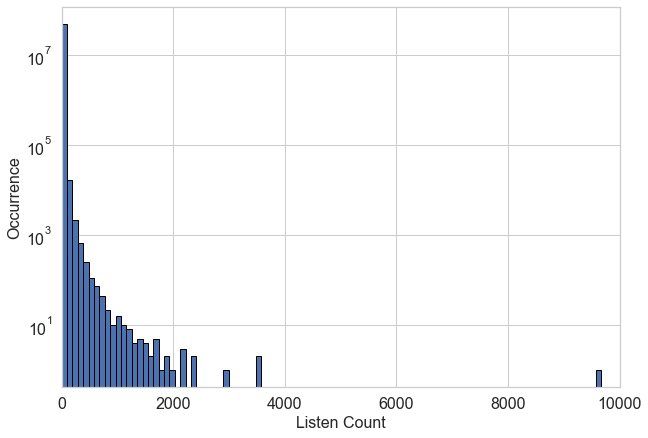

In [4]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
plt.hist(listen_count[2], bins = 100, edgecolor='black')
plt.yscale('log', nonpositive='clip')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim([0,10000])
_ = plt.xlabel('Listen Count', fontsize=16)
_ = plt.ylabel('Occurrence', fontsize=16)

## **Task 1.1 Read data from Athletes.xlsx file and keep it in a proper type for the following operations**

### The athletes information of 2021 Olympics in Tokyo
https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo/download

In [5]:
# write your code here
athletes = pd.read_excel('./input/Athletes.xlsx', header=0)
athletes.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


## **Task 1.2 Extracting the data in column 'NOC' and encoding them, then binarizing and visualizing them (number of athletes on x-axis, number of countries on y-axis)**

In [6]:
# write you code here
country_list = athletes['NOC'].unique()

In [7]:
countryDict = {}
for index,value in enumerate(country_list):
    countryDict[value] = index
# print(countryDict)

In [8]:
athletes2 = athletes.replace({'NOC':countryDict})

In [9]:
country_count = athletes2.groupby('NOC').size()
print(country_count)

NOC
0       92
1      324
2      356
3      377
4       56
      ... 
201      2
202      3
203      2
204      2
205      3
Length: 206, dtype: int64


In [10]:
athletes2['NOC'].map(country_count)

0         92
1        324
2        356
3        324
4        324
        ... 
11080    400
11081    195
11082    318
11083    318
11084    195
Name: NOC, Length: 11085, dtype: int64

In [11]:
athletes2['count'] = athletes2['NOC'].map(country_count)
athletes2.head()

,Name,NOC,Discipline,count
0,AALERUD Katrine,0,Cycling Road,92
1,ABAD Nestor,1,Artistic Gymnastics,324
2,ABAGNALE Giovanni,2,Rowing,356
3,ABALDE Alberto,1,Basketball,324
4,ABALDE Tamara,1,Basketball,324


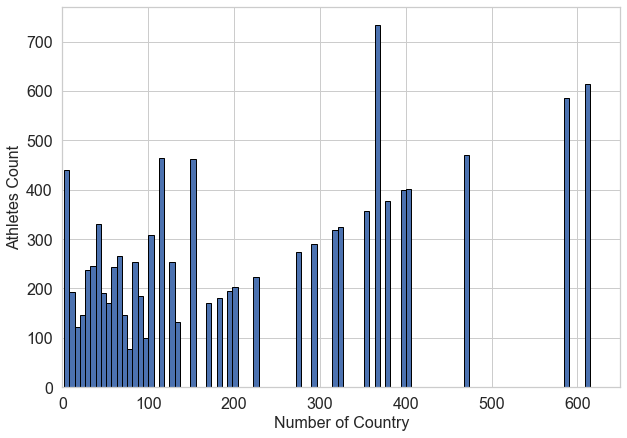

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 7))
plt.hist(athletes2['count'], bins = 100, edgecolor='black')
# plt.yscale('log', nonpositive='clip')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim([0,650])
_ = plt.xlabel('Number of Country', fontsize=16)
_ = plt.ylabel('Athletes Count', fontsize=16)

## **(Tutorial) Quantizing data**

In [13]:
# create 20 random numbers in the range (0,100)
small_counts = np.random.randint(0, 100, 20) 
small_counts

array([84, 97, 94, 35, 79, 83, 34, 76, 58, 37, 67, 57,  8, 52, 71, 75, 61,
       99, 58, 77])

In [14]:
# divided by 10 to project digits into the range (0,10) 
np.floor_divide(small_counts, 10)

array([8, 9, 9, 3, 7, 8, 3, 7, 5, 3, 6, 5, 0, 5, 7, 7, 6, 9, 5, 7])

In [15]:
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222]
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

### Example: computing deciles of Yelp business review counts
Yelp_academic_dataset_business
https://github.com/melqkiades/yelp/blob/master/notebooks/yelp_academic_dataset_business.json

In [16]:
import json

In [17]:
def load_json_df(filename, num_bytes = -1):
    '''Load the first `num_bytes` of the filename as a json blob, convert each line into a row in a Pandas data frame.'''
    fs = open(filename, encoding='utf-8')
    df = pd.DataFrame([json.loads(x) for x in fs.readlines(num_bytes)])
    fs.close()
    return df

In [18]:
biz_df = load_json_df('yelp_academic_dataset_business.json')
biz_df.shape

(15585, 15)

In [19]:
biz_df.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,O_X3PGhk3Y5JWVi866qlJg,"1501 W Bell Rd\nPhoenix, AZ 85023","{'Monday': {'close': '18:00', 'open': '11:00'}...",True,"[Active Life, Arts & Entertainment, Stadiums &...",Phoenix,29,Turf Paradise Race Course,[],-112.092329,AZ,4.0,33.638573,"{'Take-out': False, 'Wi-Fi': 'free', 'Good For...",business
1,QbrM7wqtmoNncqjc6GtFaQ,"18501 N 83rd Avenue\nGlendale, AZ 85308",{},True,"[Tires, Automotive, Fashion, Shopping, Departm...",Glendale,3,Sam's Club Members Only,[],-112.234755,AZ,3.5,33.648545,"{'Parking': {'garage': False, 'street': False,...",business
2,7lbvsGKzhjuX3oJtaXJvOg,"5000 S Arizona Mills Cir\nSte 590\nTempe, AZ 8...","{'Monday': {'close': '21:00', 'open': '10:00'}...",True,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Tempe,7,Forever 21,[],-111.964485,AZ,3.5,33.383123,"{'Parking': {'garage': False, 'street': False,...",business
3,gjxoKVsRJwEoa8zd9XxlAw,"912 W Sycamore Pl\nChandler, AZ 85225","{'Monday': {'close': '19:00', 'open': '06:00'}...",True,"[Pet Services, Pet Boarding/Pet Sitting, Pets]",Chandler,4,Loving Hands Pet Care,[],-111.857818,AZ,5.0,33.356472,{},business
4,V28yjMqyZnbCtabroJN_aA,"1745 W Glendale Ave\nPhoenix, AZ 85021",{},True,"[Veterinarians, Pets]",Phoenix,3,Amec Mid-City Animal Hospital,[],-112.097232,AZ,5.0,33.538493,{},business


In [20]:
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9]) 
deciles 

0.1     3.0
0.2     3.0
0.3     4.0
0.4     5.0
0.5     6.0
0.6     8.0
0.7    13.0
0.8    24.0
0.9    56.0
Name: review_count, dtype: float64

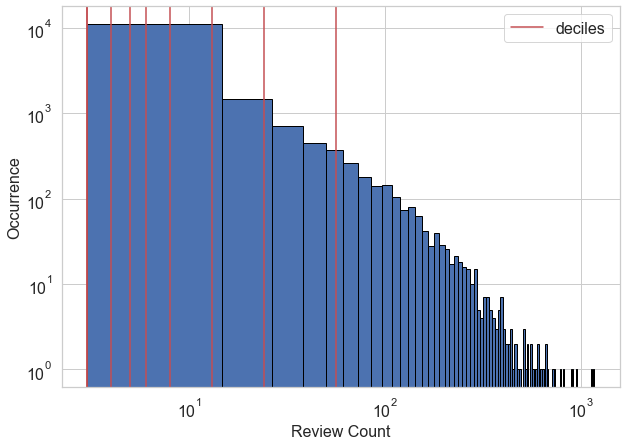

In [21]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
biz_df['review_count'].hist(ax=ax, bins=100, edgecolor='black') 
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=16) 
ax.set_xscale('log', nonpositive='clip')
ax.set_yscale('log', nonpositive='clip')
ax.tick_params(labelsize=16)
_ = ax.set_xlabel('Review Count', fontsize=16) 
_ = ax.set_ylabel('Occurrence', fontsize=16)

## Task 2. Computing the quantiles of the number of athletes from each country and visualizing the histogram (data was used in task 1). Applying log transform on the number of athletes and visualizing the histogram again.

In [22]:
# write the code here
deciles = athletes2['count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9]) 
deciles 

0.1     32.0
0.2     61.0
0.3     99.0
0.4    133.0
0.5    202.0
0.6    318.0
0.7    366.0
0.8    400.0
0.9    586.0
Name: count, dtype: float64

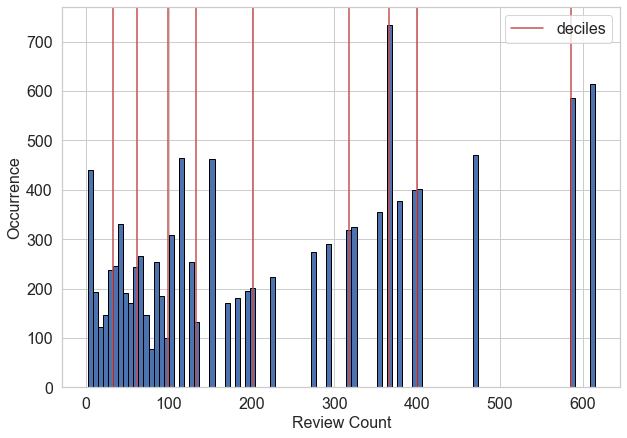

In [23]:
# not applying log transform
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
athletes2['count'].hist(ax=ax, bins=100, edgecolor='black') 
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=16) 
# ax.set_xscale('log', nonpositive='clip')
# ax.set_yscale('log', nonpositive='clip')
ax.tick_params(labelsize=16)
_ = ax.set_xlabel('Review Count', fontsize=16) 
_ = ax.set_ylabel('Occurrence', fontsize=16)

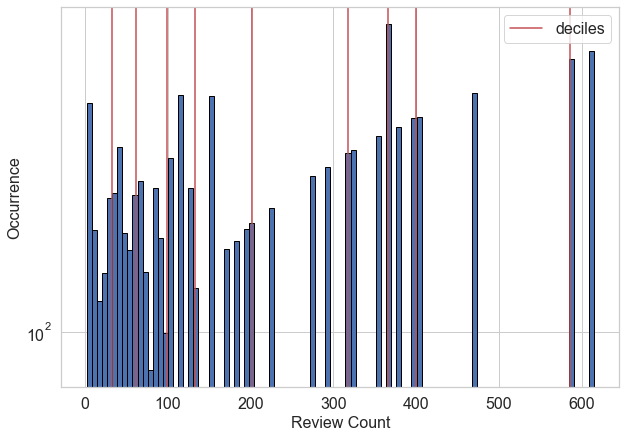

In [24]:
# applying log transform on y-axis
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
athletes2['count'].hist(ax=ax, bins=100, edgecolor='black') 
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=16) 
# ax.set_xscale('log', nonpositive='clip')
ax.set_yscale('log', nonpositive='clip')
ax.tick_params(labelsize=16)
_ = ax.set_xlabel('Review Count', fontsize=16) 
_ = ax.set_ylabel('Occurrence', fontsize=16)

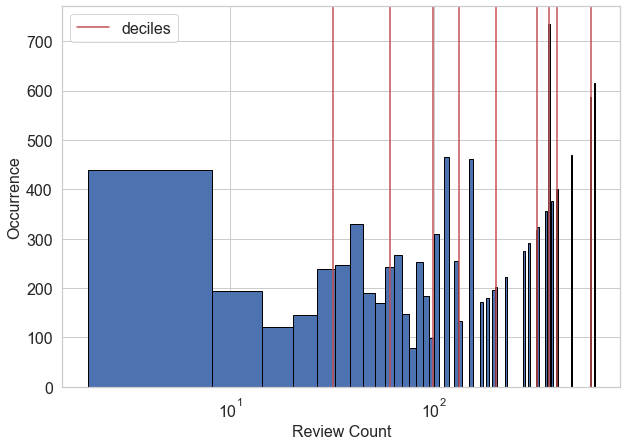

In [25]:
# applying log transform on x-axis
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
athletes2['count'].hist(ax=ax, bins=100, edgecolor='black') 
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=16) 
ax.set_xscale('log', nonpositive='clip')
# ax.set_yscale('log', nonpositive='clip')
ax.tick_params(labelsize=16)
_ = ax.set_xlabel('Review Count', fontsize=16) 
_ = ax.set_ylabel('Occurrence', fontsize=16)

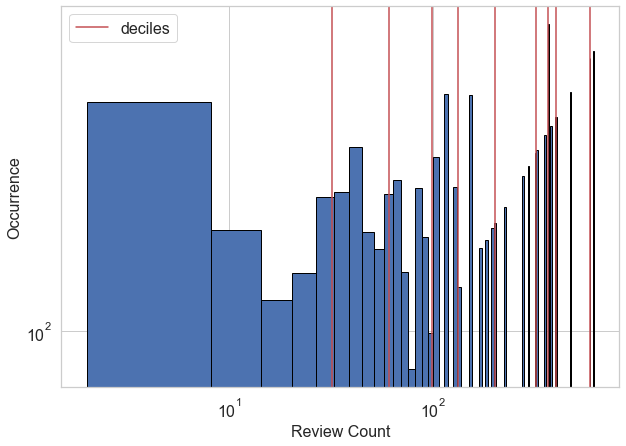

In [26]:
# applying log transform on both axis
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 7))
athletes2['count'].hist(ax=ax, bins=100, edgecolor='black') 
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=16) 
ax.set_xscale('log', nonpositive='clip')
ax.set_yscale('log', nonpositive='clip')
ax.tick_params(labelsize=16)
_ = ax.set_xlabel('Review Count', fontsize=16) 
_ = ax.set_ylabel('Occurrence', fontsize=16)

## Question 1. Comparing the histograms before and after applying log transform and answer the question: why do we need to apply log transform on some data?

**Answer to Q1**: Type your answer here

---


## **(Tutorial) Box-Cox transform**

In [27]:
x = np.arange(0.001, 3, 0.01)
lambda0 = np.log(x)
one_quarter = (x**0.25 - 1)/0.25
square_root = (x**0.5 - 1)/0.5
three_quarters = (x**0.75 - 1)/0.75
one_point_five = (x**1.5 - 1)/1.5

Text(0.5, 1.0, 'Box-Cox Transforms')

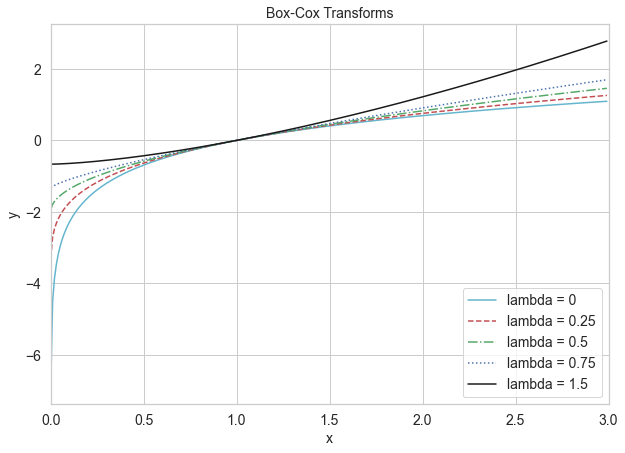

In [28]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(x, lambda0, 'c', 
         x, one_quarter, 'r--', 
         x, square_root, 'g-.', 
         x, three_quarters, 'b:',
         x, one_point_five, 'k')
plt.legend(['lambda = 0', 'lambda = 0.25', 'lambda = 0.5', 'lambda = 0.75', 'lambda = 1.5'], 
           loc='lower right',
           prop={'size': 14})
ax.tick_params(labelsize=14)
ax.set_xlim([0.0,3.0])
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_title('Box-Cox Transforms', fontsize=14)

## Example: Visualizing the histograms of original, log transformed, and Box-Cox transformed review counts

In [29]:
from scipy import stats

In [30]:
rc_log = stats.boxcox(biz_df['review_count'], lmbda=0)
rc_bc, bc_params = stats.boxcox(biz_df['review_count'])
biz_df['rc_bc'] = rc_bc
biz_df['rc_log'] = rc_log

Text(0, 0.5, 'Occurrence')

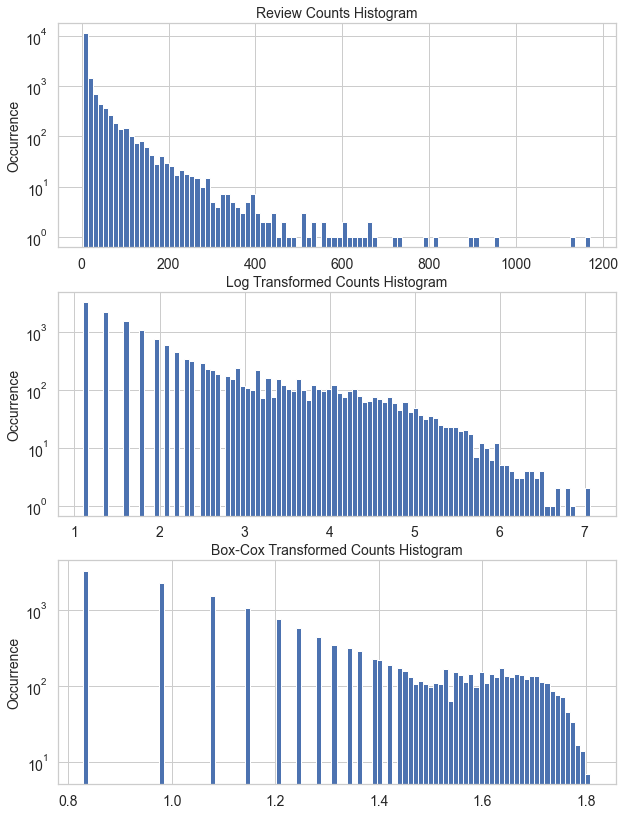

In [31]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 14))

# 원본 리뷰 카운트 히스토그램
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.set_yscale('log', nonpositive='clip')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# 로그 변환된 리뷰 카운트
biz_df['rc_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log', nonpositive='clip')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

# Box-Cox 변환된 리뷰 카운트
biz_df['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log', nonpositive='clip')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

## **Task 3. Visualizing the histograms of original, log transformed, and Box-Cox transformed athletes numbers (data used in task 1 and task 2)**

In [32]:
# write your code here
rc_log = stats.boxcox(athletes2['count'], lmbda=0)
rc_bc, bc_params = stats.boxcox(athletes2['count'])
athletes2['rc_bc'] = rc_bc
athletes2['rc_log'] = rc_log

Text(0, 0.5, 'Occurrence')

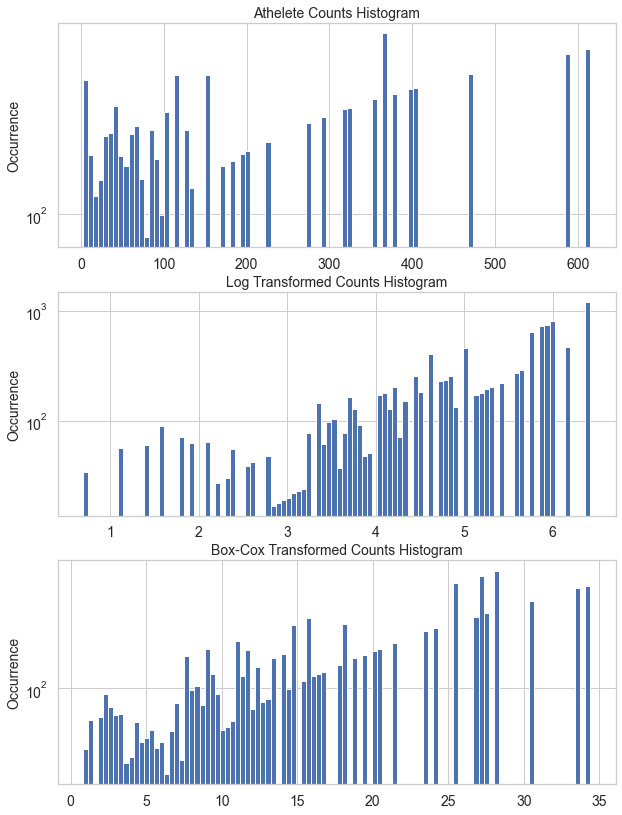

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 14))

# 원본 리뷰 카운트 히스토그램
athletes2['count'].hist(ax=ax1, bins=100)
ax1.set_yscale('log', nonpositive='clip')
ax1.tick_params(labelsize=14)
ax1.set_title('Athelete Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# 로그 변환된 리뷰 카운트
athletes2['rc_log'].hist(ax=ax2, bins=100)
ax2.set_yscale('log', nonpositive='clip')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

# Box-Cox 변환된 리뷰 카운트
athletes2['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log', nonpositive='clip')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)

## Question 2. Listing another transform method other than log and box-cox transform. Explain when to use them.

**Answer to Q2:** write your answer here

---


## Feature scaling example
**Online News Popularity Dataset**: https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip

In [34]:
import sklearn.preprocessing as preproc

In [35]:
news_df = pd.read_csv('./OnlineNewsPopularity/OnlineNewsPopularity.csv', delimiter=', ',engine = 'python') 
news_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [36]:
# Min-max scaling
news_df['minmax'] = preproc.minmax_scale(news_df[['n_tokens_content']])
news_df['minmax'].values

array([0.02584376, 0.03009205, 0.02489969, ..., 0.05215955, 0.08048147,
       0.01852726])

In [37]:
# Standardization
news_df['standardized'] = preproc.StandardScaler().fit_transform(news_df[['n_tokens_content']])
news_df['standardized'].values

array([-0.69521045, -0.61879381, -0.71219192, ..., -0.2218518 ,
        0.28759248, -0.82681689])

In [38]:
# L2-normalization
news_df['l2_normalized'] = preproc.normalize(news_df[['n_tokens_content']], axis=0)
news_df['l2_normalized'].values

array([0.00152439, 0.00177498, 0.00146871, ..., 0.00307663, 0.0047472 ,
       0.00109283])

Text(0.5, 39.49999999999994, 'L2-normalized word count')

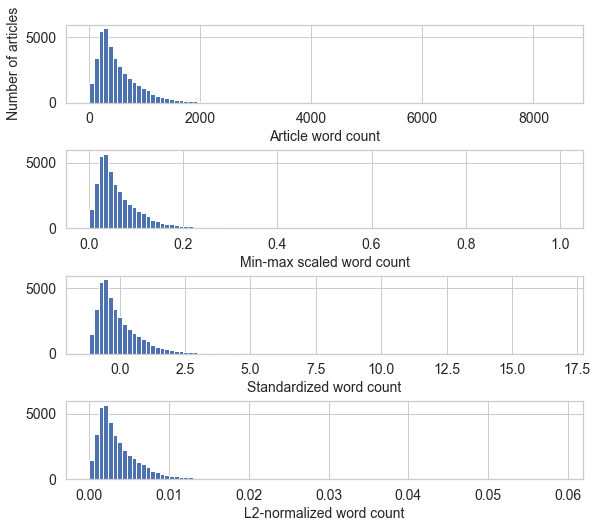

In [39]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8, 7))
fig.tight_layout(h_pad=2.0)

news_df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)

news_df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
# ax2.set_ylabel('Number of articles', fontsize=14)

news_df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
# ax3.set_ylabel('Number of articles', fontsize=14)

news_df['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
# ax4.set_ylabel('Number of articles', fontsize=14)

##  Task 4. Visualizing the histograms of original and scaled data (the data used in the previous tasks)

In [40]:
# write your code here
# Min-max scaling
athletes2['minmax'] = preproc.minmax_scale(athletes2[['count']])
athletes2['minmax'].values

array([0.14681892, 0.52528548, 0.57748777, ..., 0.51549755, 0.51549755,
       0.31484502])

In [41]:
# Standardization
athletes2['standardized'] = preproc.StandardScaler().fit_transform(athletes2[['count']])
athletes2['standardized'].values

array([-0.82648175,  0.423385  ,  0.59578041, ...,  0.39106086,
        0.39106086, -0.27158401])

In [42]:
# L2-normalization
athletes2['l2_normalized'] = preproc.normalize(athletes2[['count']], axis=0)
athletes2['l2_normalized'].values

array([0.0028398 , 0.01000103, 0.01098879, ..., 0.00981583, 0.00981583,
       0.00601914])

Text(0.5, 39.49999999999994, 'L2-normalized Athelete count')

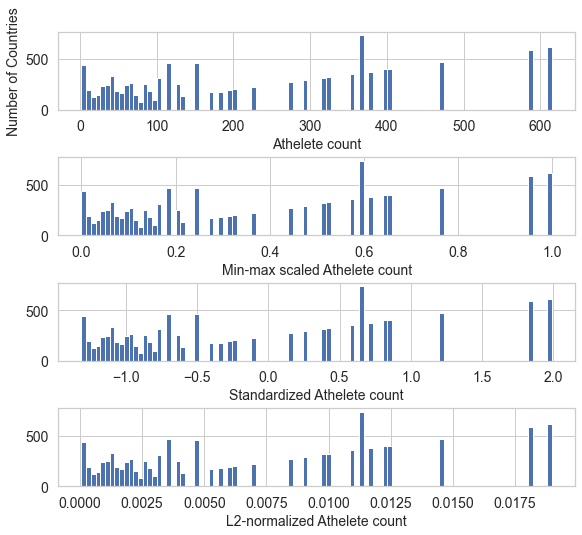

In [43]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8, 7))
fig.tight_layout(h_pad=2.0)

athletes2['count'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Athelete count', fontsize=14)
ax1.set_ylabel('Number of Countries', fontsize=14)

athletes2['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled Athelete count', fontsize=14)
# ax2.set_ylabel('Number of articles', fontsize=14)

athletes2['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized Athelete count', fontsize=14)
# ax3.set_ylabel('Number of articles', fontsize=14)

athletes2['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized Athelete count', fontsize=14)
# ax4.set_ylabel('Number of articles', fontsize=14)

## Question 3. Comparing the four histograms, listing the similarities and differences between them.

**Answer to Q3**: type your answer here

---


## Question 4. Comparing the histograms of feature scaling and the histograms of transforms, listing the main difference between them.

**Answer to Q4:** type your answer here

---


## Example of interaction features in prediction

In [44]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preproc

In [45]:
news_df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [46]:
features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
            'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 
            'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus',
            'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world']

In [47]:
X = news_df[features]
y = news_df[['shares']]

X.shape

(39644, 17)

In [48]:
X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X)
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, test_size=0.3, random_state=123)

In [49]:
def evaluate_feature(X_train, X_test, y_train, y_test):
    """Fit a linear regression model on the training set and score on the test set"""
    model = linear_model.LinearRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)

In [50]:
(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
print("R-squared score with singleton features: %0.5f" % r1)

(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)
print("R-squared score with pairwise features: %0.10f" % r2)

R-squared score with singleton features: 0.00924
R-squared score with pairwise features: 0.0113217469


## Task 5. Interaction features in prediction with dry bean dataset
**Dry bean dataset**: https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip

**note:** Try to encode categorical data into numeric data (the last column 'class') first.
Then apply the interation features and compare the r-squared scores of the singleton features and the interaction features

In [51]:
# write your code here
drybeans = pd.read_excel('./input/DryBeanDataset/Dry_Bean_Dataset.xlsx', header=0)
drybeans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [52]:
# show unique classes
drybeans['Class'].nunique()

7

In [53]:
# extract bean classes
beanclass = drybeans['Class'].unique()
beanclass

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [54]:
dict = {}
for index,bean in enumerate(beanclass):
    dict[bean] = index
print(dict)

{'SEKER': 0, 'BARBUNYA': 1, 'BOMBAY': 2, 'CALI': 3, 'HOROZ': 4, 'SIRA': 5, 'DERMASON': 6}


In [55]:
# encode class with number
drybeans2 = drybeans.replace({'Class':dict})
drybeans2.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0


In [56]:
drybeans2.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [57]:
features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']

In [58]:
X = drybeans2[features]
y = drybeans2['Class']

X.shape

(13611, 16)

In [59]:
X2 = preproc.PolynomialFeatures(include_bias=False).fit_transform(X)
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, test_size=0.3, random_state=123)

In [60]:
def evaluate_feature(X_train, X_test, y_train, y_test):
    """Fit a linear regression model on the training set and score on the test set"""
    model = linear_model.LinearRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)

In [61]:
(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
print("R-squared score with singleton features: %0.5f" % r1)

(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)
print("R-squared score with pairwise features: %0.10f" % r2)

R-squared score with singleton features: 0.78178
R-squared score with pairwise features: 0.7816889452
